In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal',"Density"]

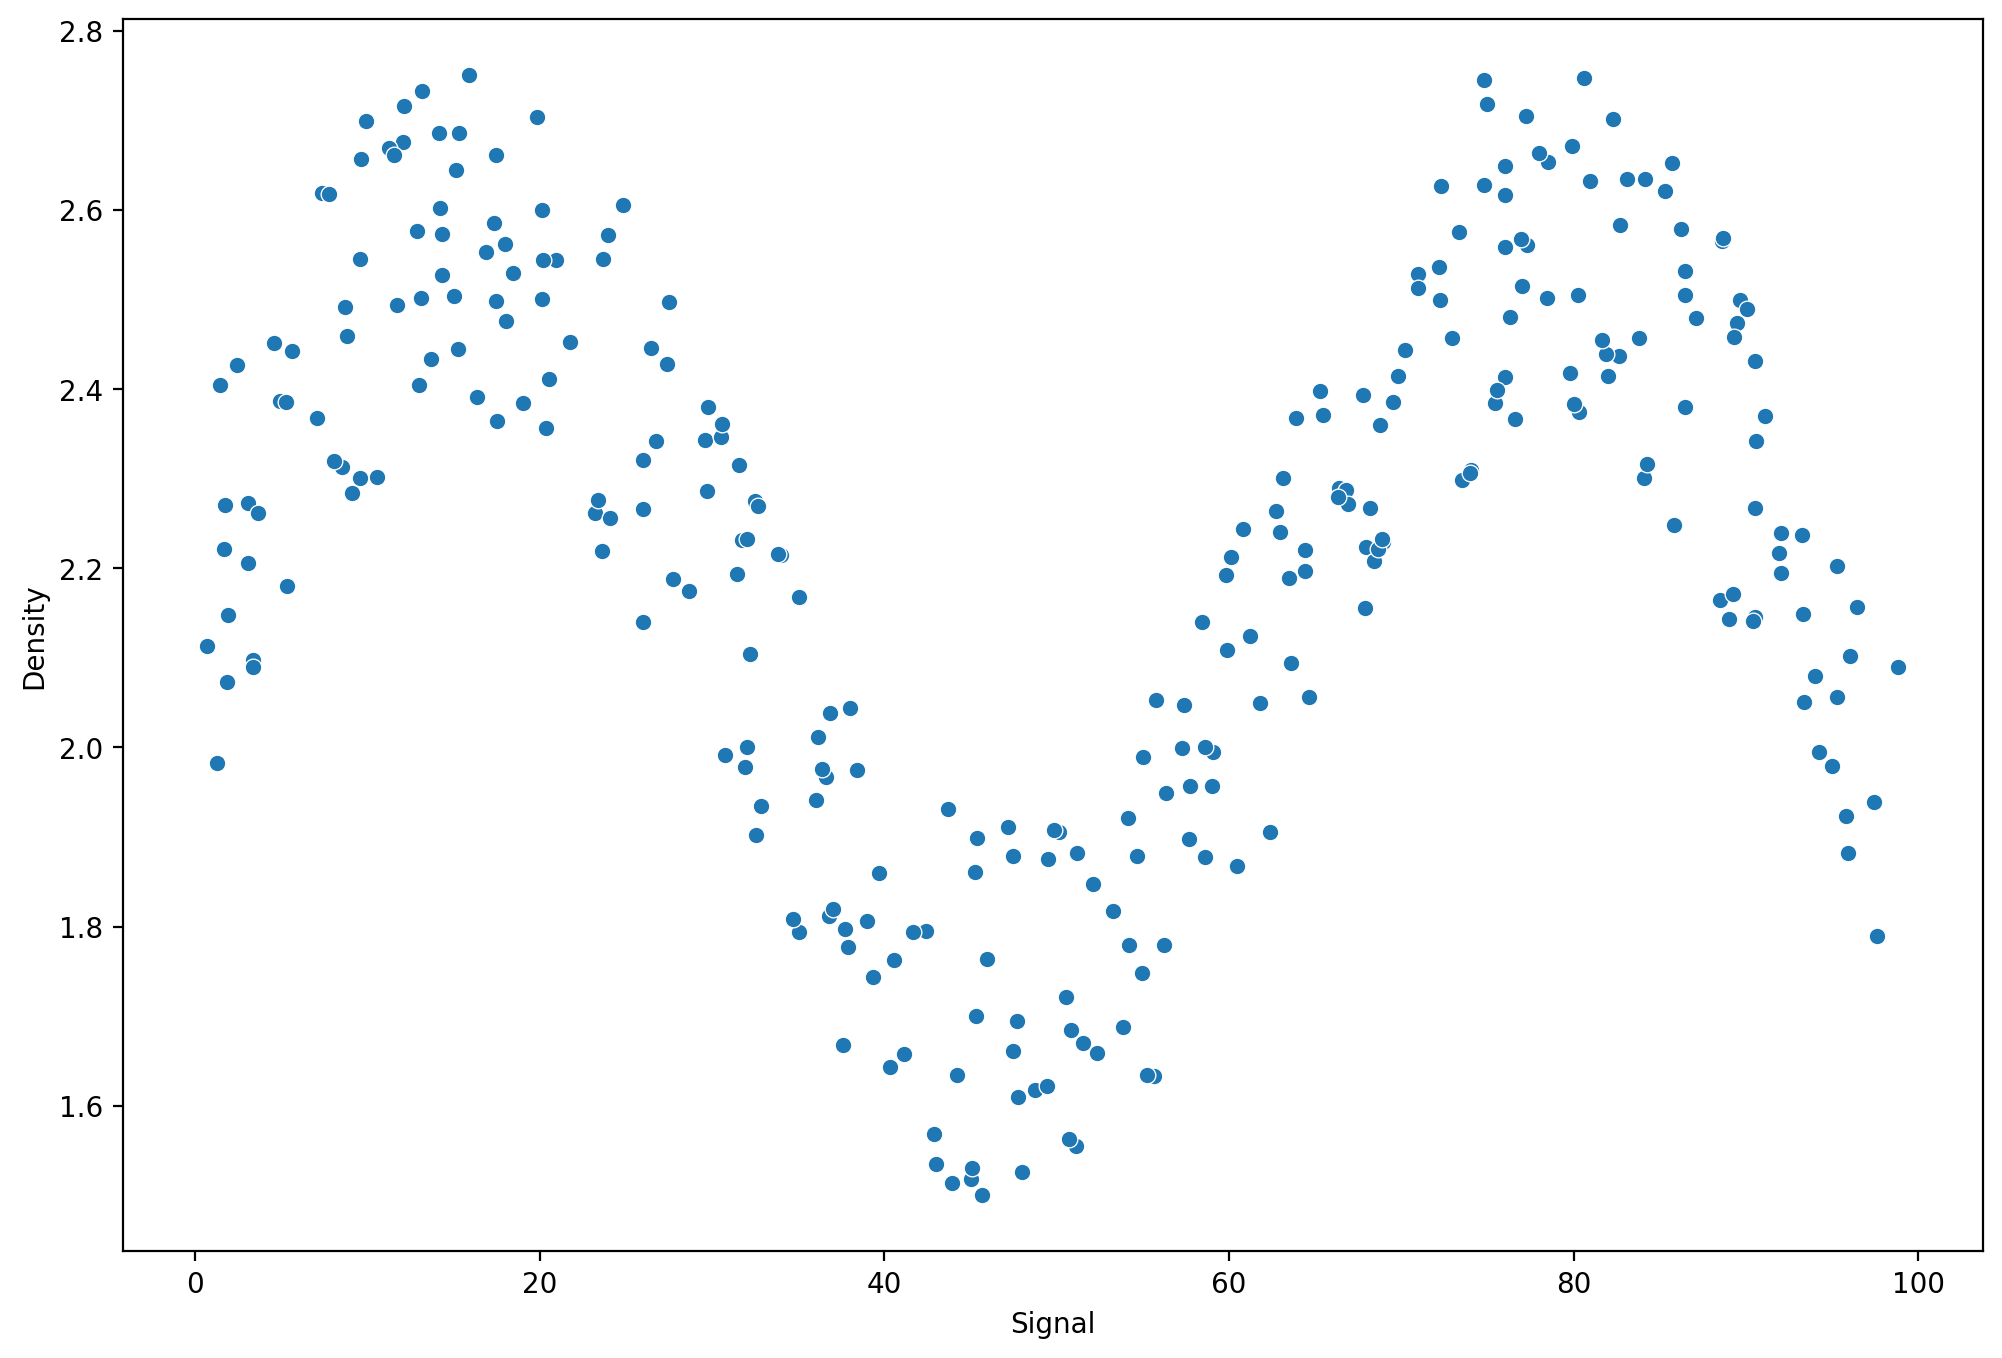

In [6]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df);

In [13]:
# ....values.reshape(-1,1)   применяется когда только 1 признак, иначе на моменте обучения модели будет ошибка
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Линейная регрессия

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr_model = LinearRegression()

In [18]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [19]:
lr_preds = lr_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.25700519965846297

In [22]:
signal_range = np.arange(0,100)
lr_output = lr_model.predict(signal_range.reshape(-1,1))

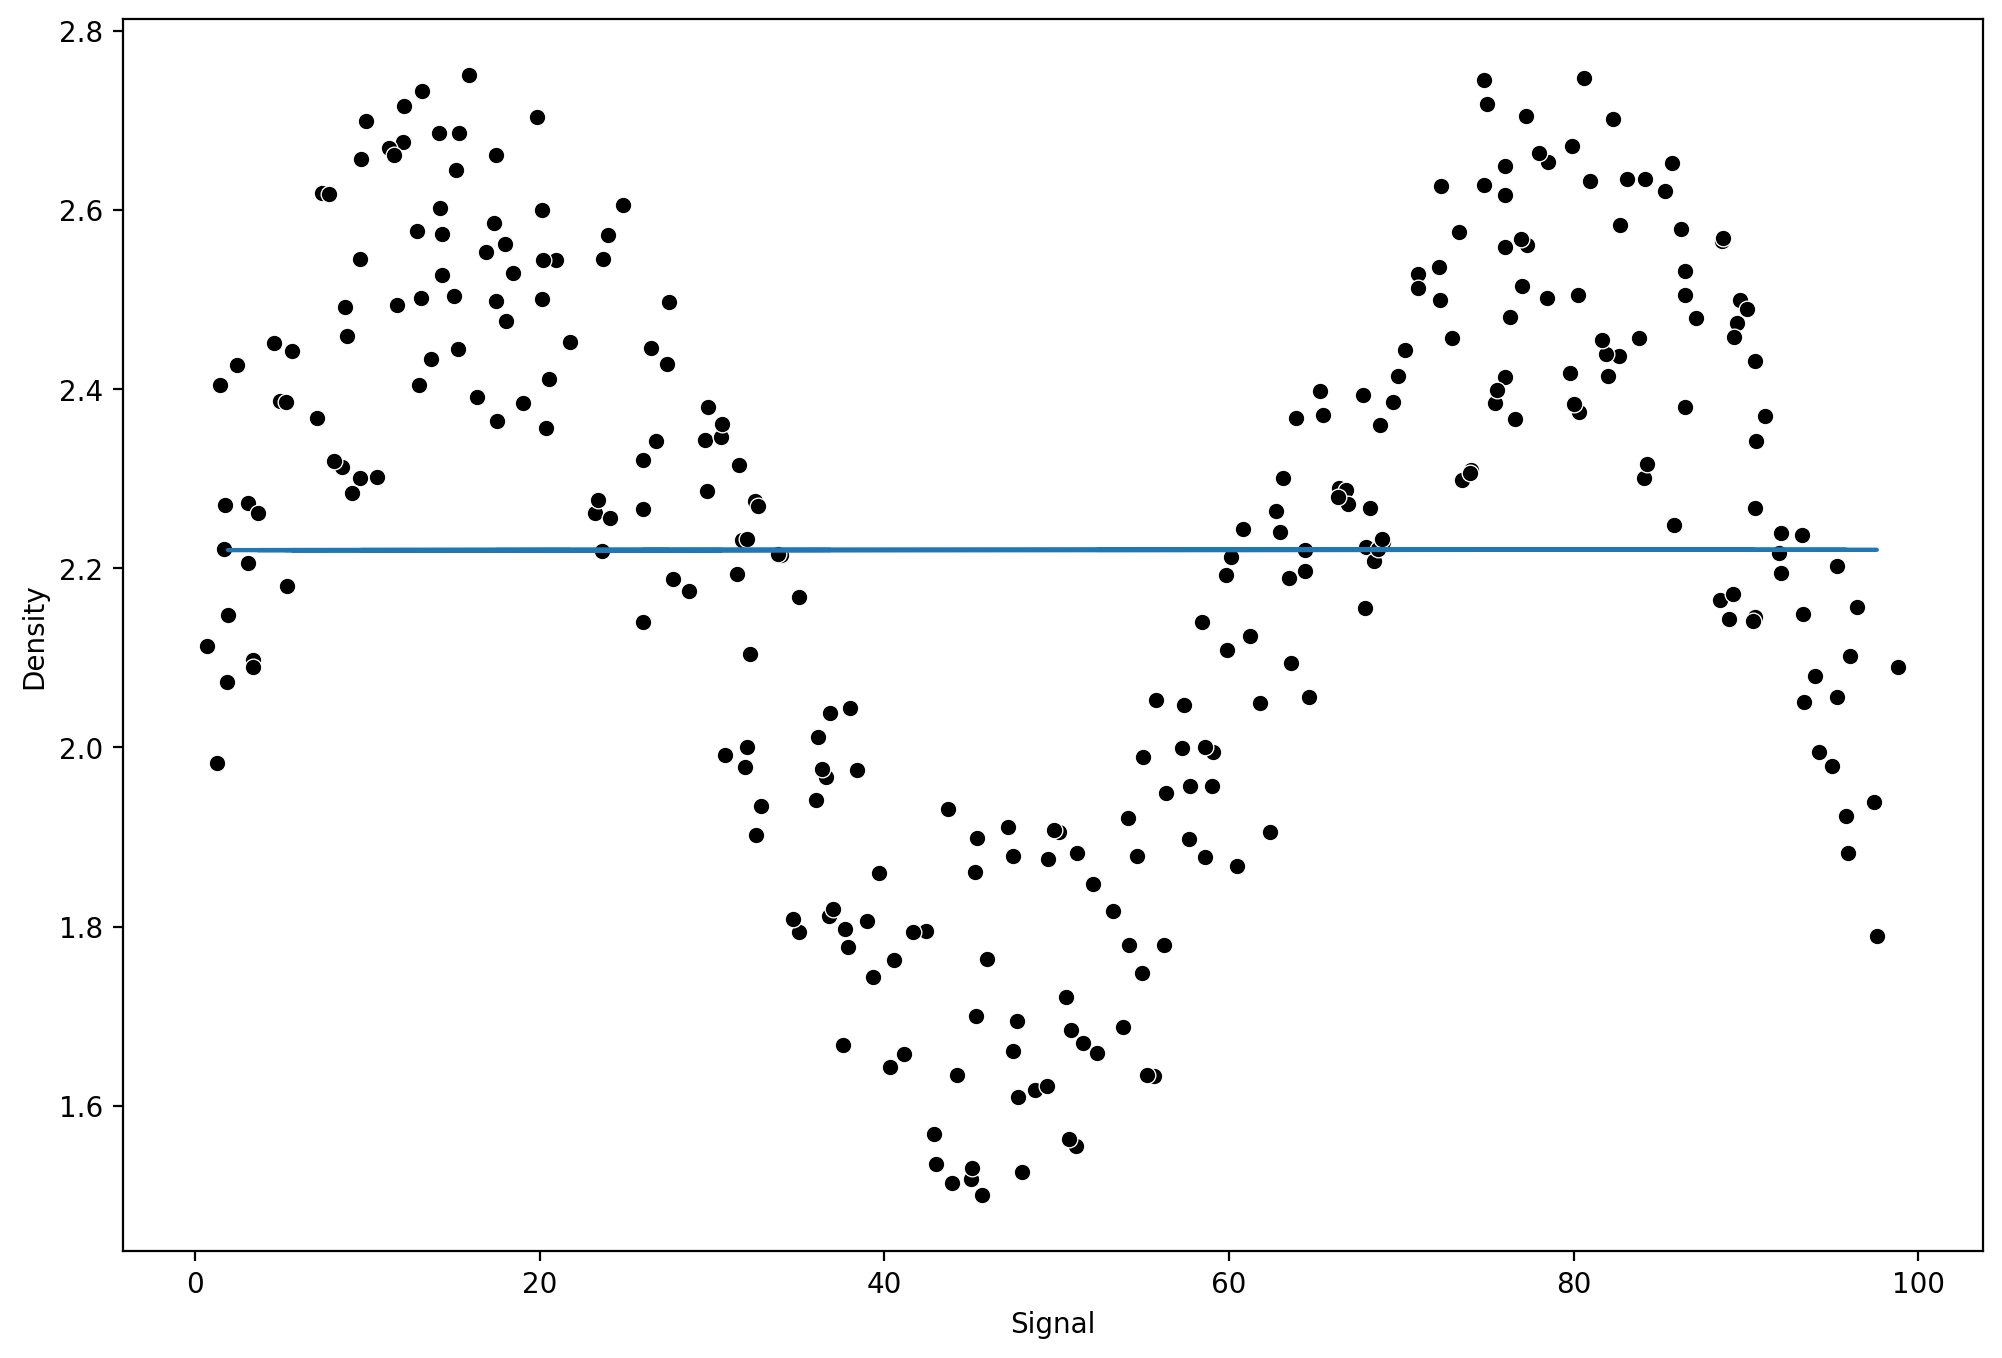

In [29]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(X_test,lr_preds);
#plt.plot(signal_range,lr_output);

# Полиномиальная регрессия

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [39]:
# функция для запуска моделей
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Обучение модели
    model.fit(X_train,y_train)
    
    # Вычисление метрик
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE : {mae}')
    print(f'RMSE : {rmse}')
    
    # Рисуем график с результатами
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

MAE : 0.211198973318633
RMSE : 0.25700519965846297


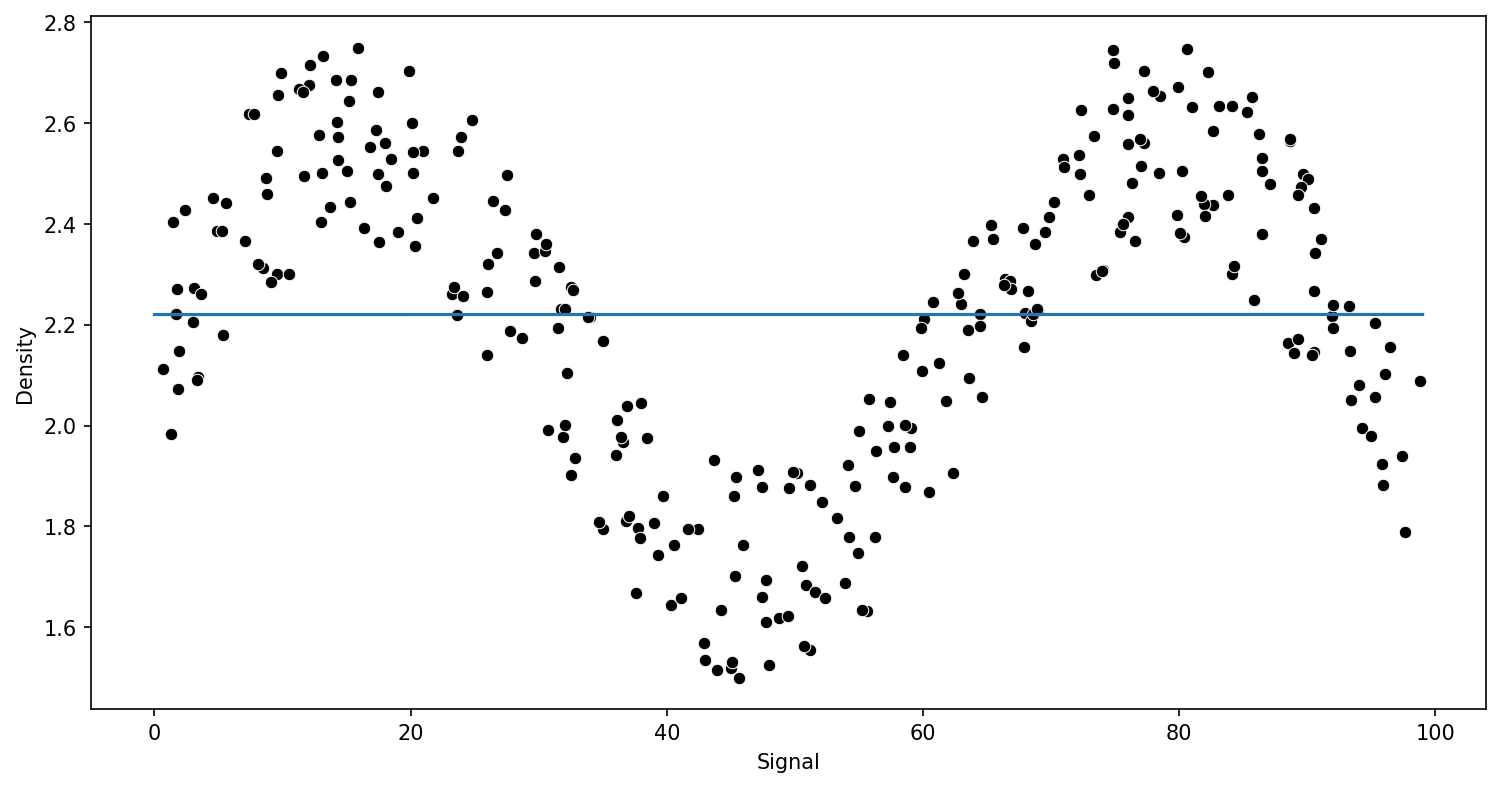

In [40]:
run_model(model,X_train,y_train,X_test,y_test)

### Пайплайн для степеней полинома

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [42]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

MAE : 0.22903105443511335
RMSE : 0.2817309563725596


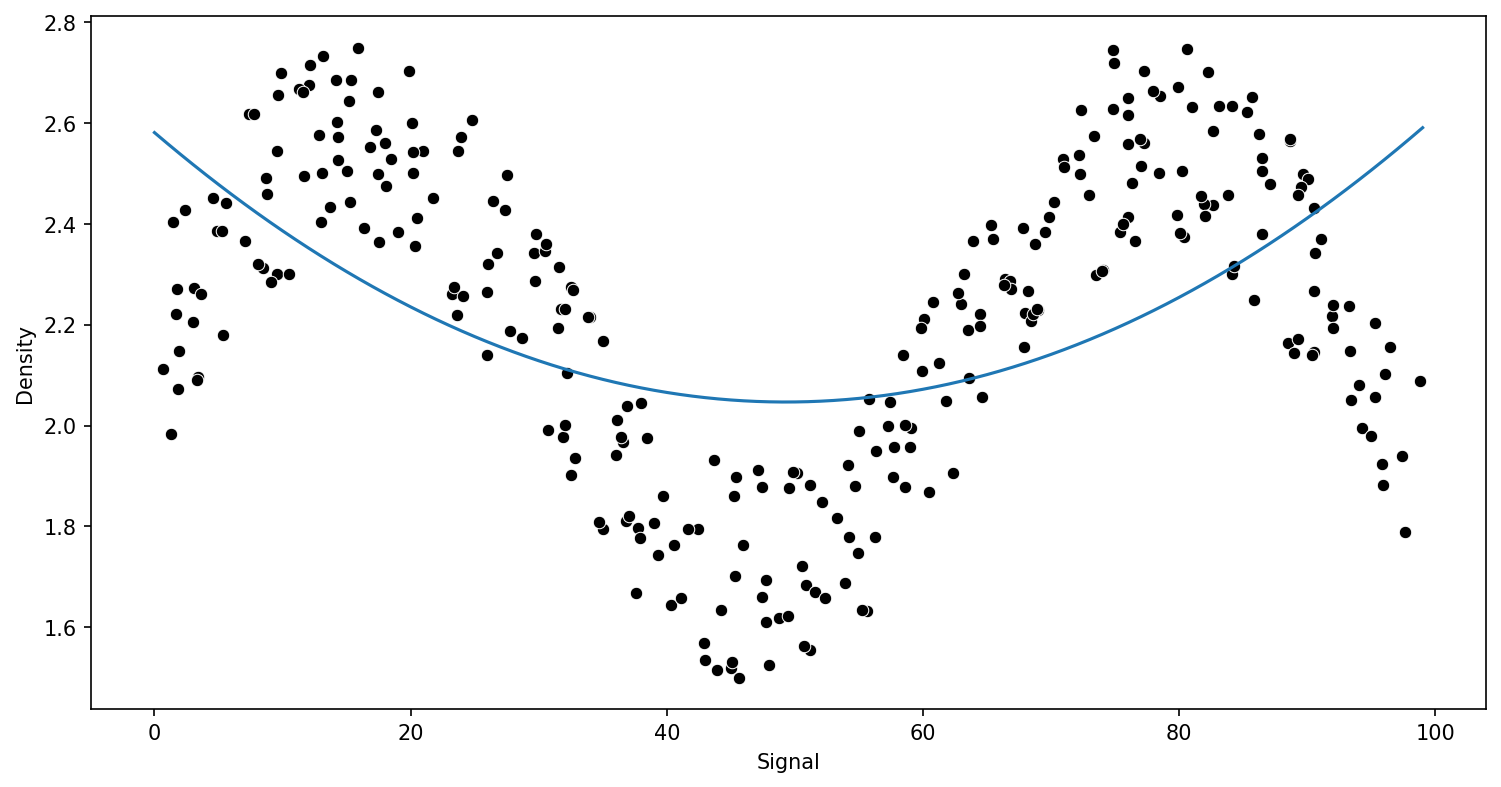

In [43]:
run_model(pipe,X_train,y_train,X_test,y_test)

MAE : 0.11969152420598782
RMSE : 0.13807488497741482


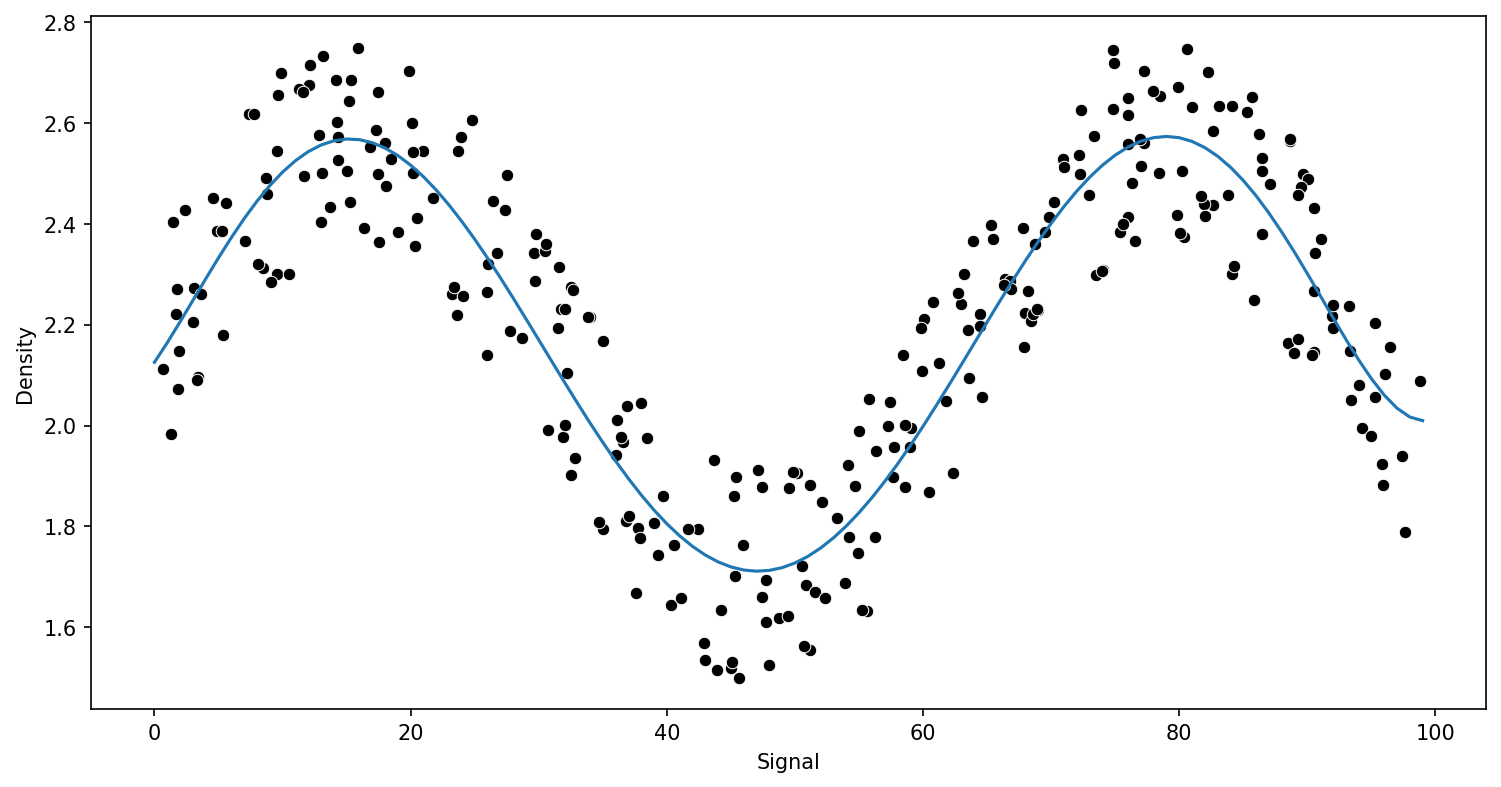

In [46]:
pipe = make_pipeline(PolynomialFeatures(6),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

## Регрессия KNN 

In [47]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442382
RMSE : 0.15234870286353372
MAE : 0.12198383614100564
RMSE : 0.13730685016923655
MAE : 0.11635971693292672
RMSE : 0.13277855732740926
MAE : 0.12878322504026188
RMSE : 0.151321497164368


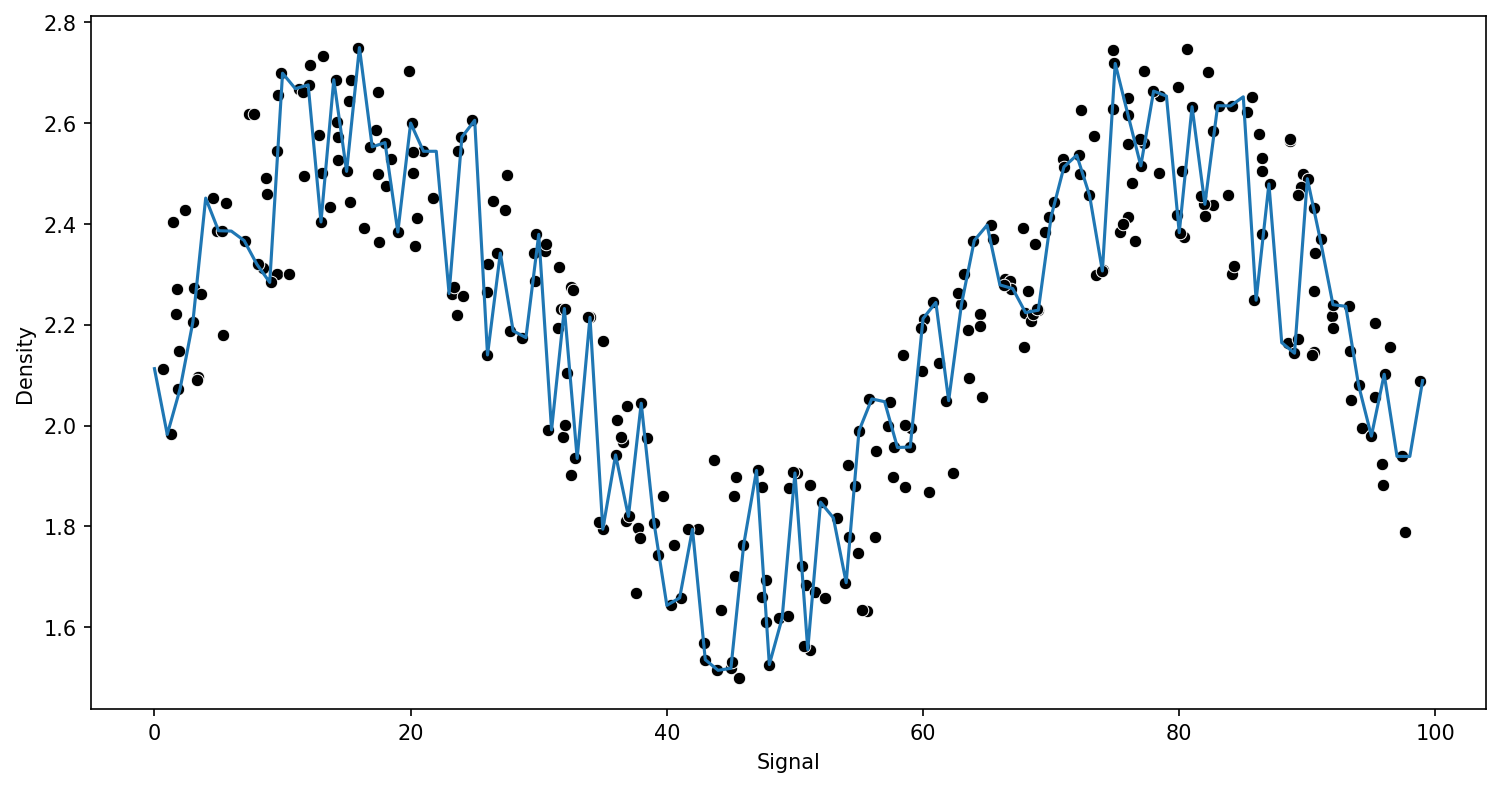

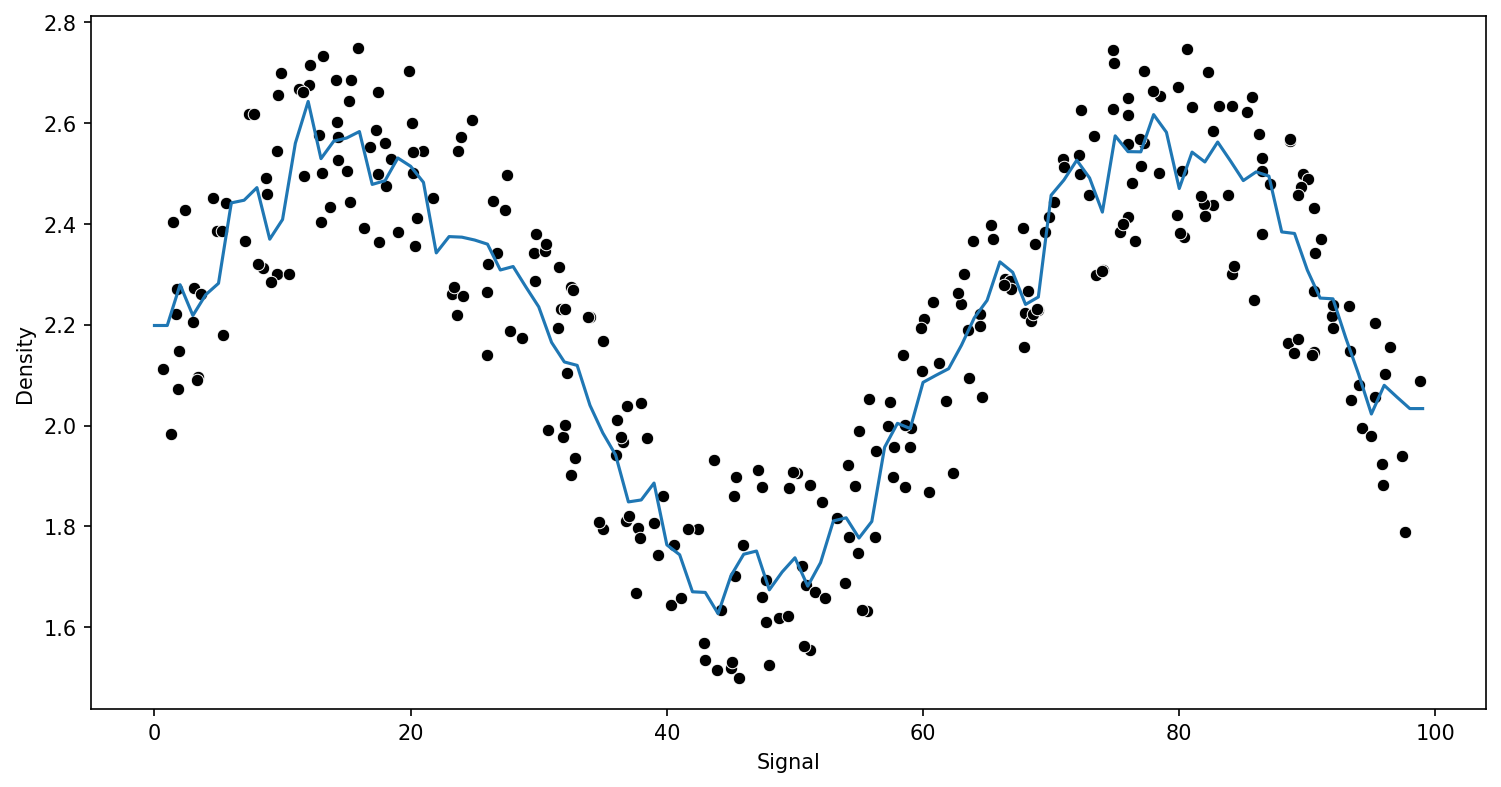

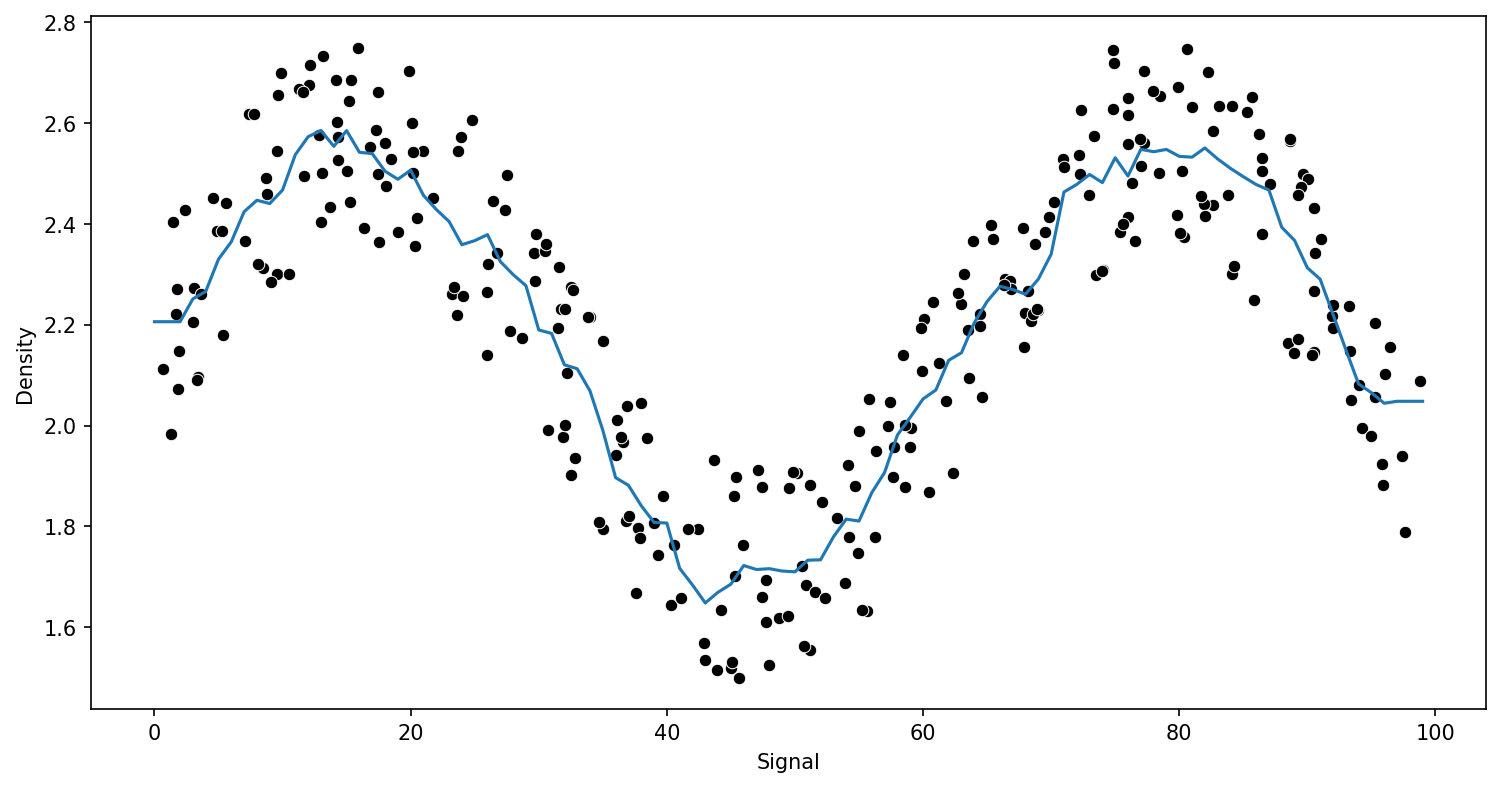

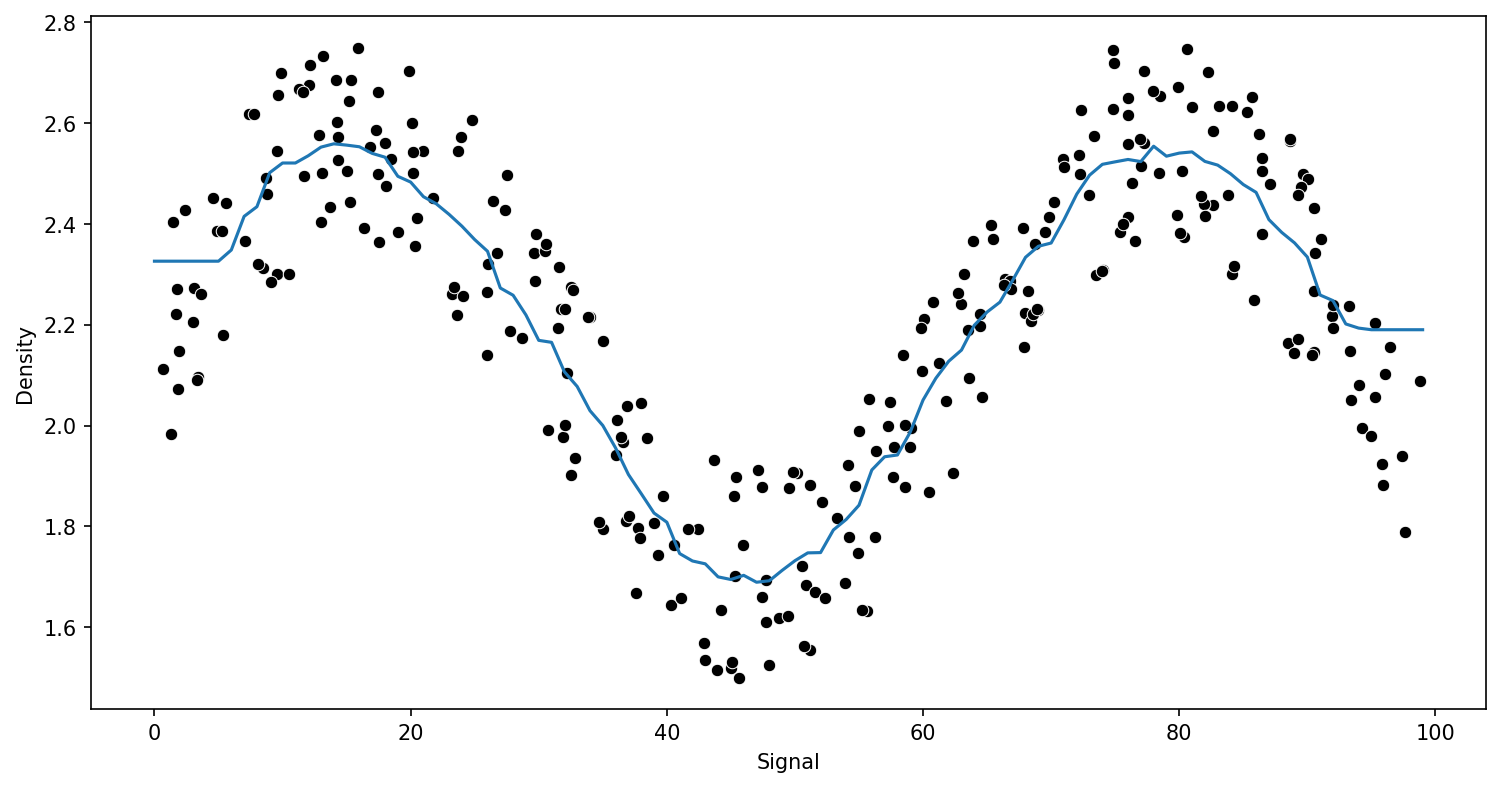

In [52]:
preds = {}
k_values = [1,5,10,25]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

## Деревья решений для регрессии

In [53]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442382
RMSE : 0.15234870286353372


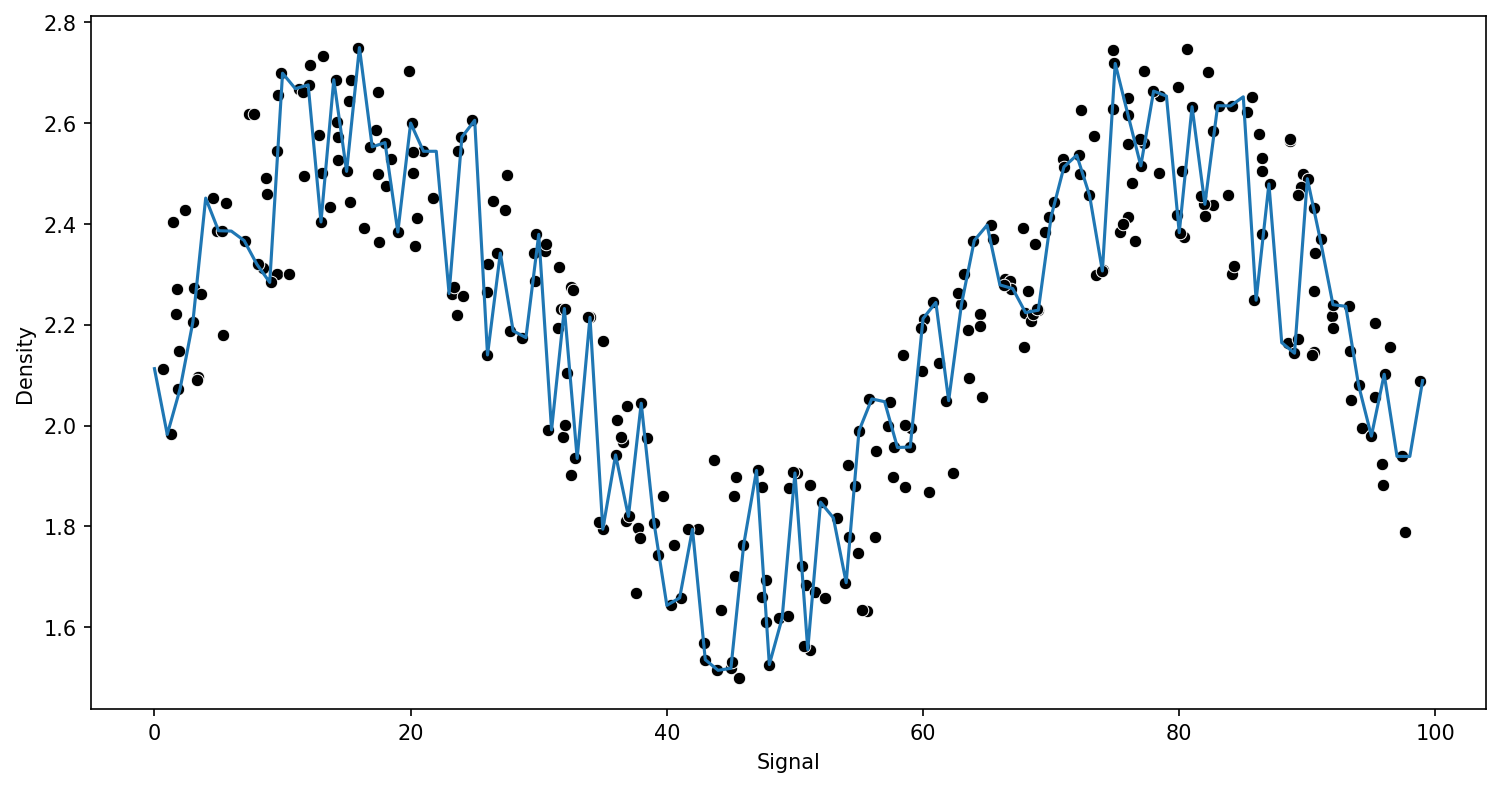

In [54]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

## Метод опорных векторов для регрессии

In [56]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [58]:
grid = GridSearchCV(svr,param_grid)

MAE : 0.10839253242165772
RMSE : 0.12634668775105407


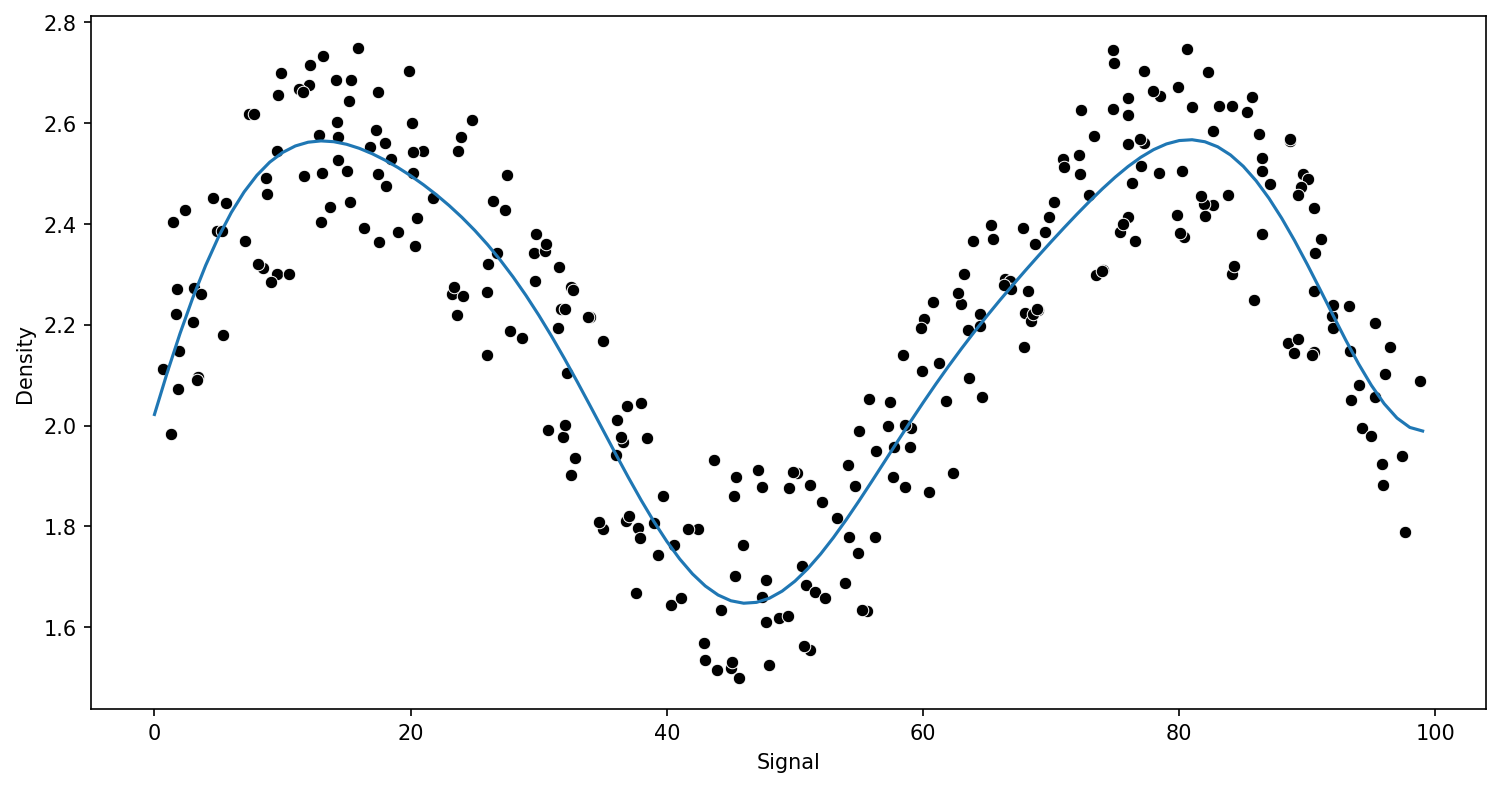

In [59]:
run_model(grid,X_train,y_train,X_test,y_test)

In [60]:
grid.best_params_

{'C': 1000, 'gamma': 'scale'}

## Случайные леса для регрессии

In [61]:
from sklearn.ensemble import RandomForestRegressor

MAE : 0.12085129410057843
RMSE : 0.14061886205685575
MAE : 0.1111747485839
RMSE : 0.13473694333804595
MAE : 0.10830335257427218
RMSE : 0.1322021244623548
MAE : 0.11297727759141672
RMSE : 0.1350442254530434


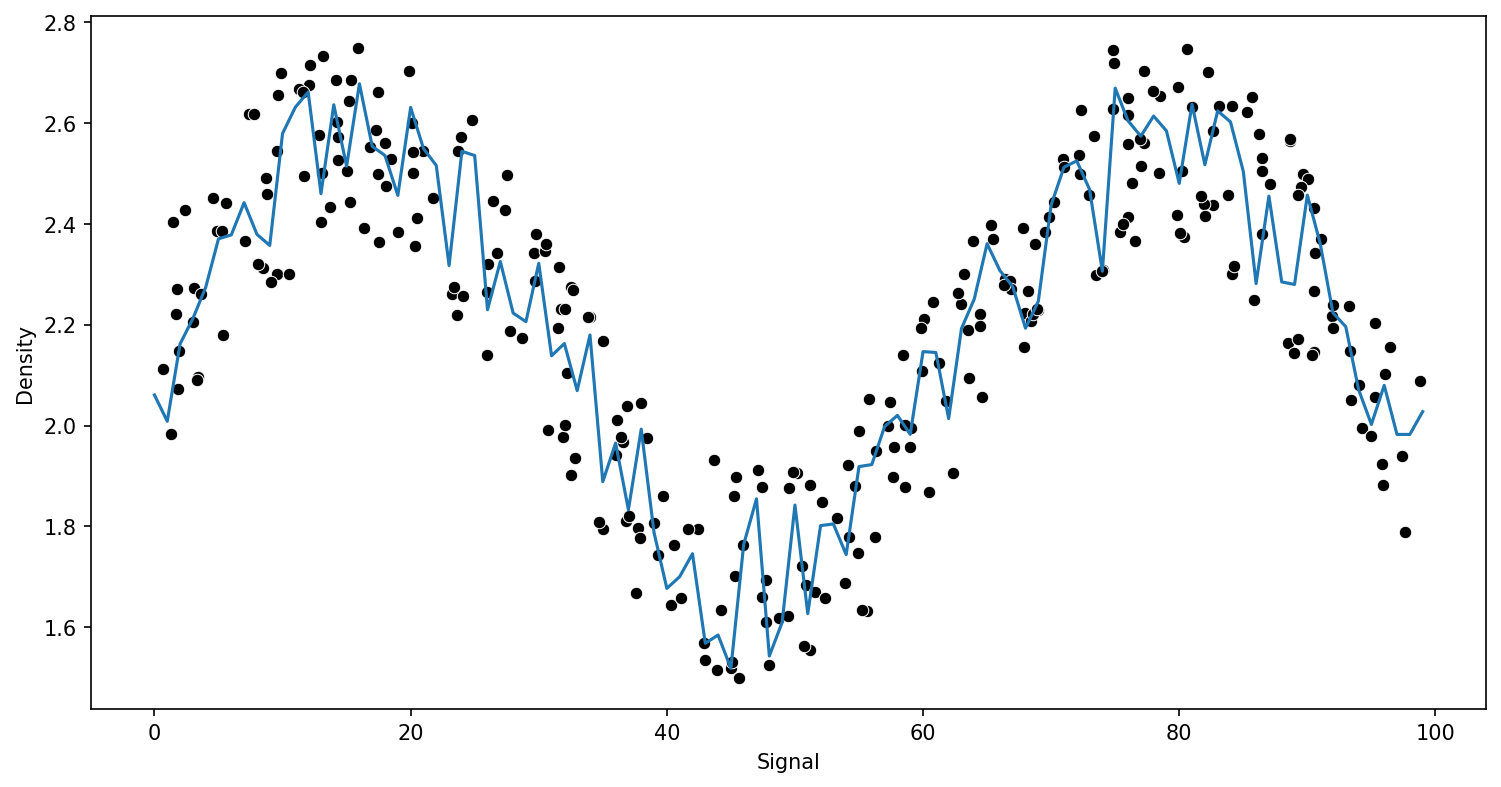

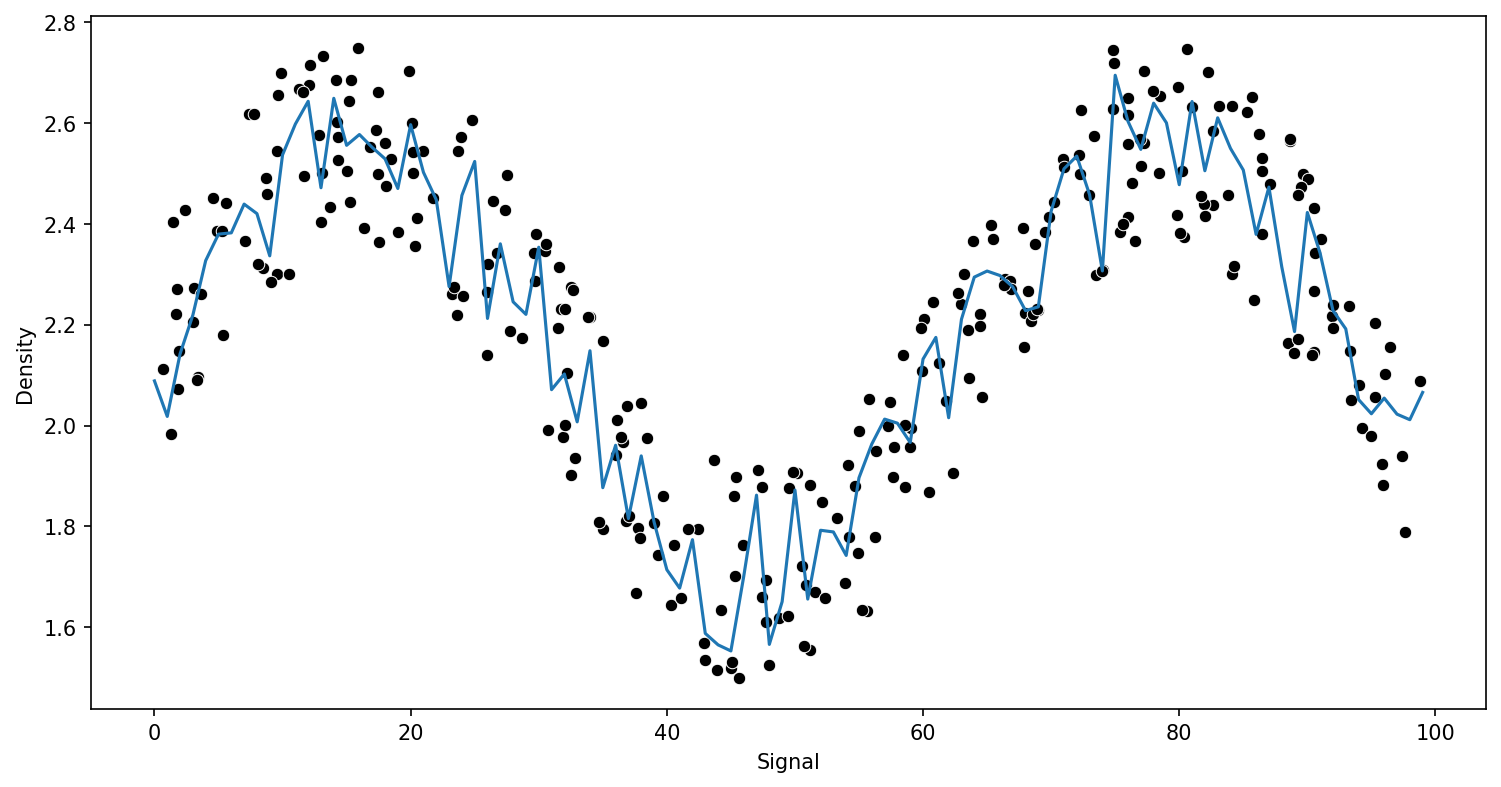

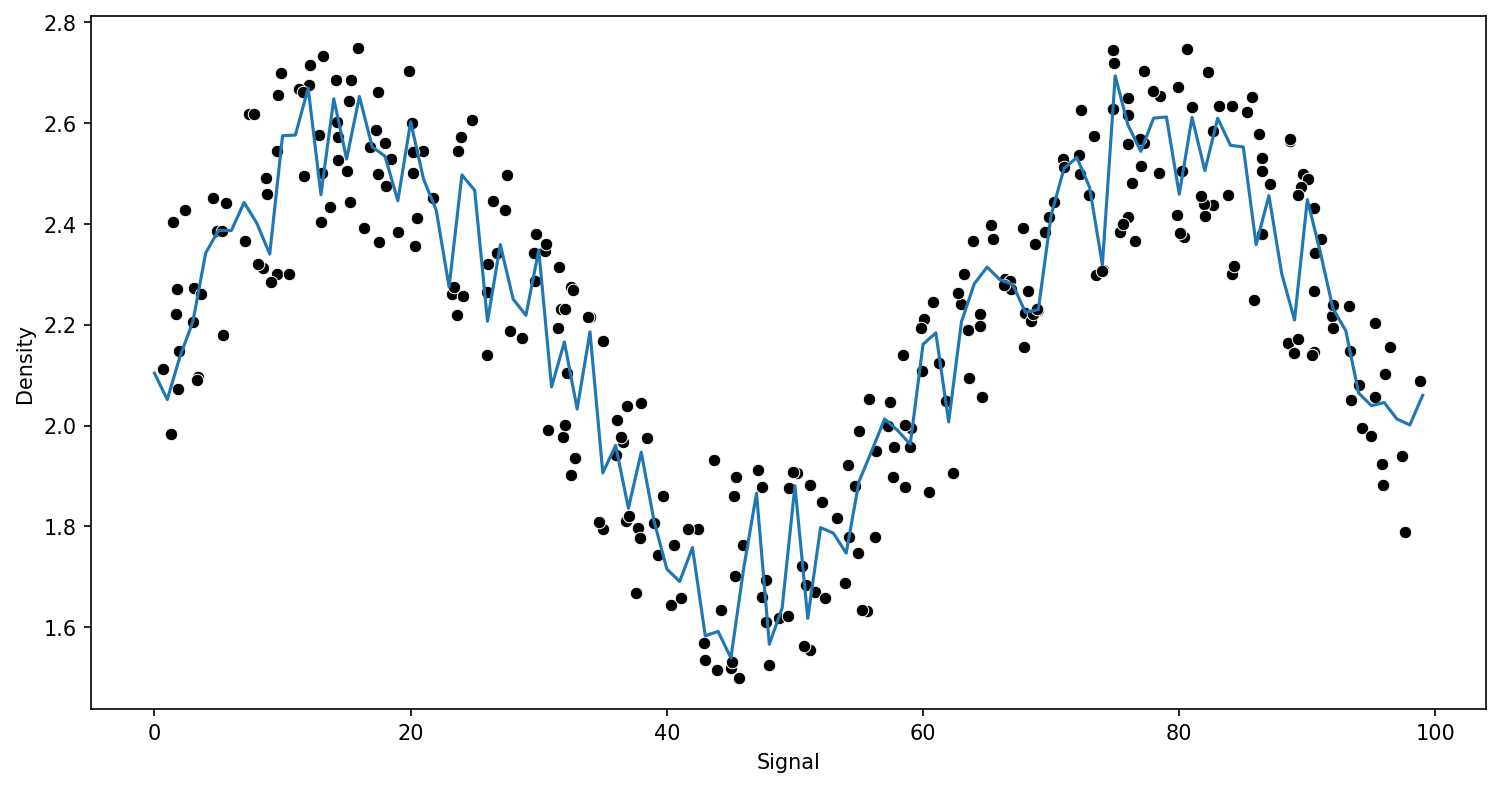

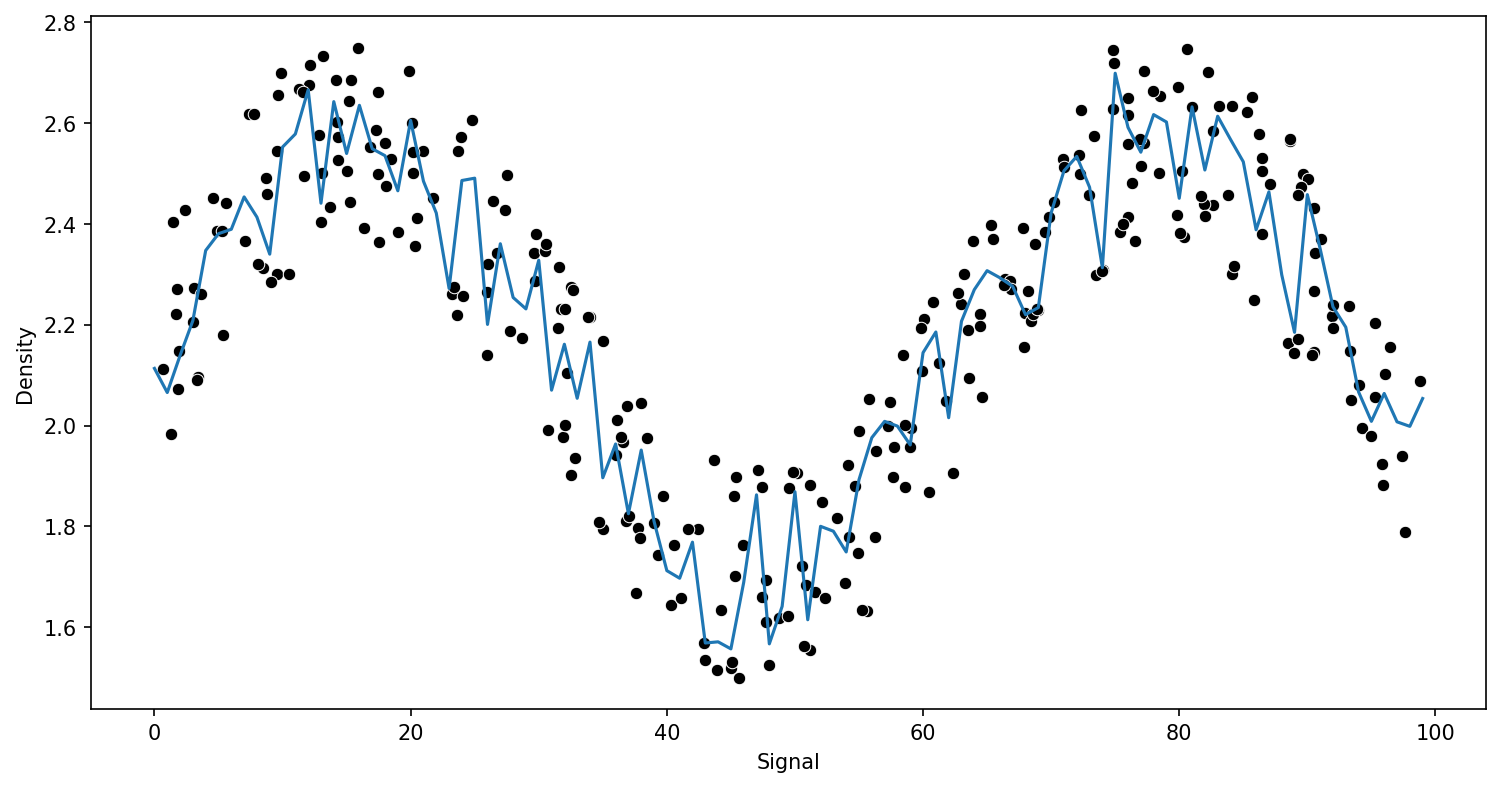

In [62]:
trees = [10,50,100,128]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Градиентный бустинг

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

MAE : 0.11318284854800689
RMSE : 0.13294148649584667


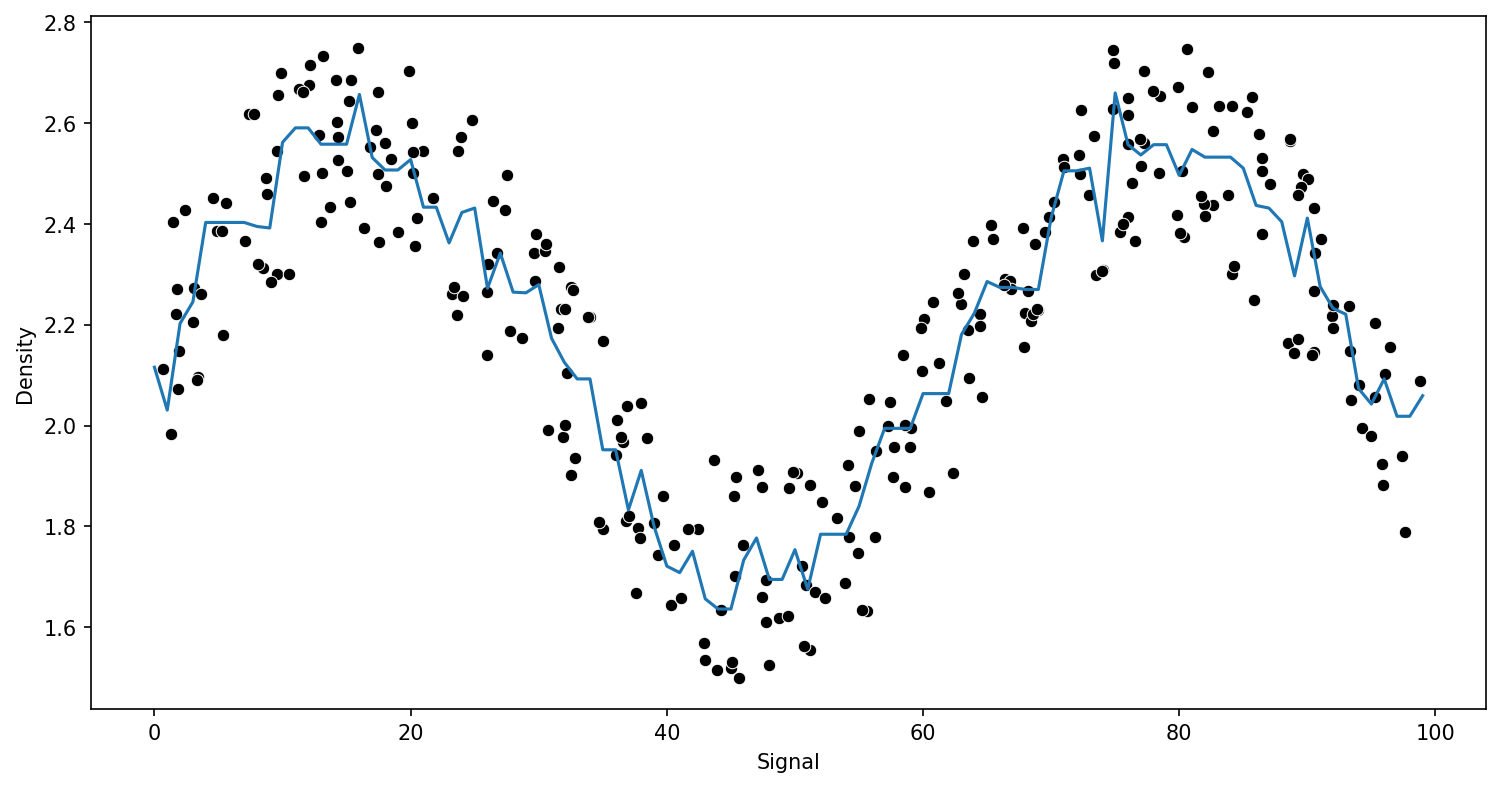

In [64]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [65]:
from sklearn.ensemble import AdaBoostRegressor

MAE : 0.11318284854800689
RMSE : 0.13294148649584667


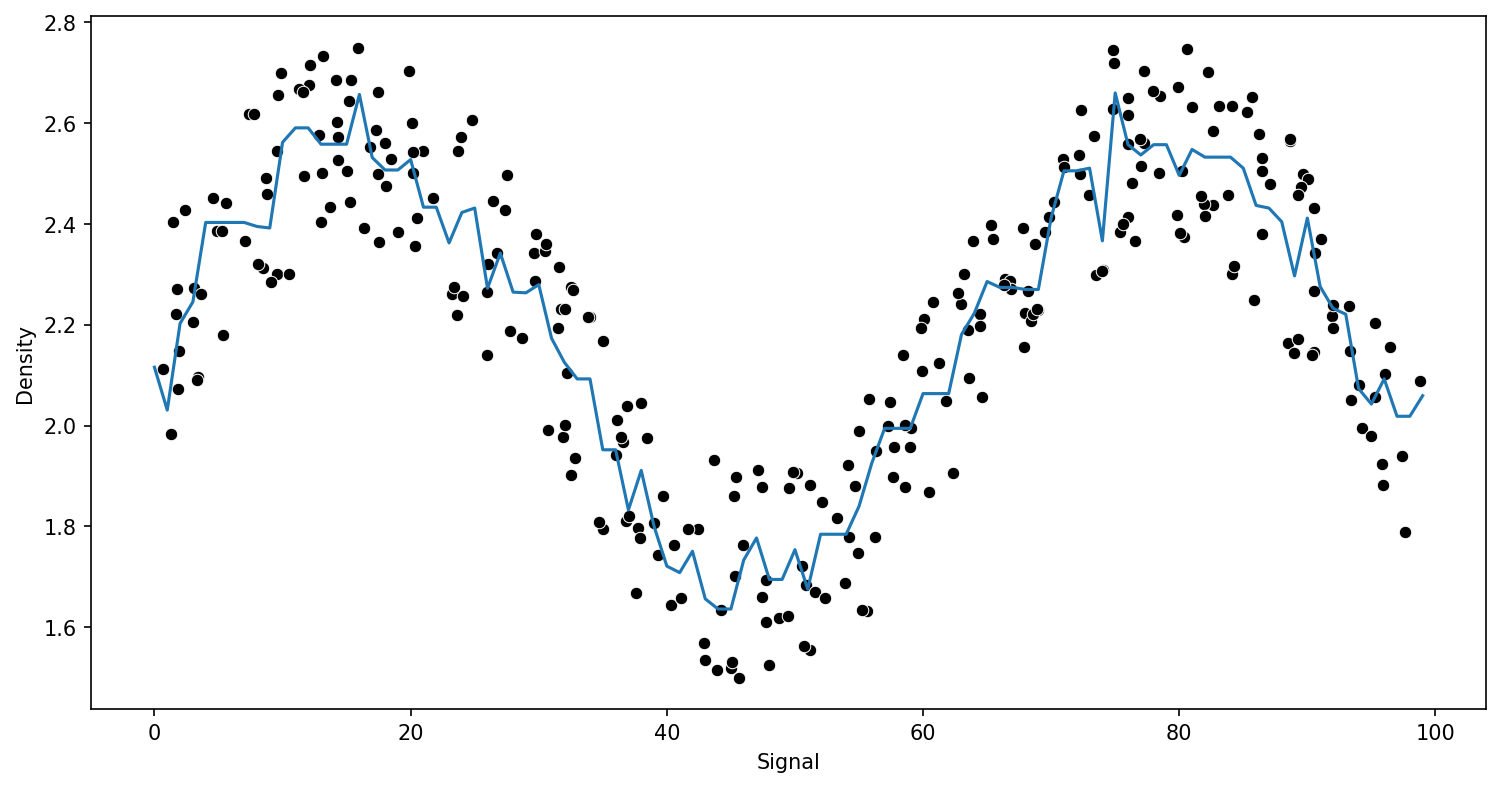

In [66]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)